In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os
trainOne=os.listdir('/kaggle/input/skindatasets/skin/train')
trainTow=os.listdir("/kaggle/input/dateset-23-skin/dataset")
cat=trainTow
cat2=['Normal','vitiligo']
def data_dictionary():
    path_trainOne="/kaggle/input/dateset-23-skin/dataset/"
    path_trainTow="/kaggle/input/skindatasets/skin/train/"
    list_train=cat
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        print(i)
        path_disease_train=path_trainOne+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)
                
        k+=1
    L=23    
    for i in list_train1:
       
        path_disease_test=path_trainTow+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j
            if img_path_train!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
                
            #print(img_path_train)
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(L)
        L+=1    
          
    train_df=pd.DataFrame(train_dictionary)
    train_df = train_df.groupby("target").head(700) 
    
    return  train_df

In [4]:
train=data_dictionary()


Light Diseases and Disorders of Pigmentation
Lupus and other Connective Tissue diseases
Acne and Rosacea Photos
Systemic Disease
Poison Ivy Photos and other Contact Dermatitis
Vascular Tumors
Urticaria Hives
Atopic Dermatitis Photos
Bullous Disease Photos
Hair Loss Photos Alopecia and other Hair Diseases
Tinea Ringworm Candidiasis and other Fungal Infections
Psoriasis pictures Lichen Planus and related diseases
Melanoma Skin Cancer Nevi and Moles
Nail Fungus and other Nail Disease
Scabies Lyme Disease and other Infestations and Bites
Eczema Photos
Exanthems and Drug Eruptions
Herpes HPV and other STDs Photos
Seborrheic Keratoses and other Benign Tumors
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Vasculitis Photos
Cellulitis Impetigo and other Bacterial Infections
Warts Molluscum and other Viral Infections


In [5]:
import cv2
images=[]
label=[]
for i in train['image_path']:
    img=cv2.imread(i)
    img=cv2.resize(img,(100,100),interpolation=cv2.INTER_AREA)
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    #img=resize_and_rescale(img)
    images.append(img)

In [6]:
label=train['target']

In [7]:
import numpy as np
import pandas as pd

In [8]:
data=np.array(images)


In [9]:
label=np.array(label)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=44)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=1)

In [41]:
X_train.shape

(11200, 100, 100, 3)

In [42]:
X_test.shape

(3500, 100, 100, 3)

In [43]:
import keras
num_classes = 25
y_train = keras.utils.to_categorical(y_train, num_classes)

In [44]:
y_validation=keras.utils.to_categorical(y_validation, num_classes)

In [45]:
y_test=keras.utils.to_categorical(y_test, num_classes)

In [16]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50,EfficientNetB7
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Step 1: Choose a Pre-trained Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
# Step 2: Model Modification
x = base_model.output
x = Flatten()(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dense(128, activation='relu')(x)
# x = Flatten()(x)
# x = BatchNormalization()(x)
# x = Dense(64, activation='relu')(x)

predictions = Dense(25, activation='softmax')(x)


94765736/94765736 [==============================] - 0s 0us/step


In [33]:
model = Model(inputs=base_model.input, outputs=predictions)
# Step 3: Freeze Pre-trained Layers
for layer in base_model.layers:
    layer.trainable = False


In [34]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']       

In [35]:
# Step 5: Model Training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation))


Epoch 1/30
350/350 [==============================] - 17s 38ms/step - loss: 5.0001 - accuracy: 0.5670 - val_loss: 2.8546 - val_accuracy: 0.7232
Epoch 2/30
350/350 [==============================] - 12s 33ms/step - loss: 1.2480 - accuracy: 0.8601 - val_loss: 2.5034 - val_accuracy: 0.8100
Epoch 3/30
350/350 [==============================] - 12s 34ms/step - loss: 0.8634 - accuracy: 0.9171 - val_loss: 2.7703 - val_accuracy: 0.8268
Epoch 4/30
350/350 [==============================] - 12s 34ms/step - loss: 0.8050 - accuracy: 0.9298 - val_loss: 2.3477 - val_accuracy: 0.8550
Epoch 5/30
350/350 [==============================] - 12s 34ms/step - loss: 0.7636 - accuracy: 0.9363 - val_loss: 2.7567 - val_accuracy: 0.8436
Epoch 6/30
350/350 [==============================] - 12s 34ms/step - loss: 0.8491 - accuracy: 0.9360 - val_loss: 3.1855 - val_accuracy: 0.8514
Epoch 7/30
350/350 [==============================] - 12s 34ms/step - loss: 0.6205 - accuracy: 0.9601 - val_loss: 3.2235 - val_accuracy:

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [37]:
y_pred=model.predict(X_test)

110/110 [==============================] - 4s 30ms/step


In [38]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([16, 15, 24, ...,  3, 19,  8])

In [46]:
y_test=np.argmax(y_test, axis=1)

In [47]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

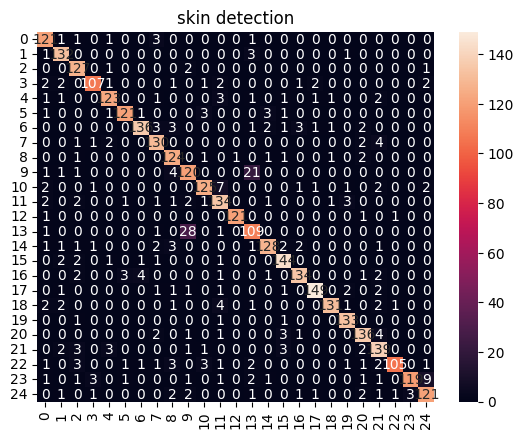

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

In [49]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [50]:
confusion_matrix=classification_report(y_test,y_pred2)

In [51]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       128
           1       0.90      0.96      0.93       137
           2       0.87      0.97      0.92       131
           3       0.94      0.88      0.91       121
           4       0.92      0.91      0.92       135
           5       0.95      0.92      0.94       131
           6       0.95      0.89      0.92       153
           7       0.89      0.93      0.91       140
           8       0.87      0.94      0.90       132
           9       0.76      0.81      0.78       148
          10       0.93      0.88      0.90       142
          11       0.85      0.90      0.87       149
          12       0.99      0.98      0.98       124
          13       0.76      0.78      0.77       140
          14       0.93      0.90      0.91       143
          15       0.91      0.95      0.93       152
          16       0.94      0.91      0.92       148
          17       0.96    

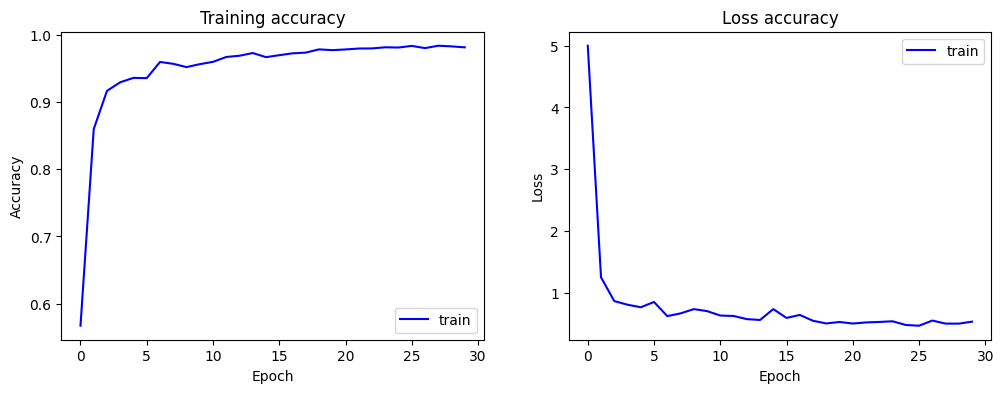

In [53]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')